In [1]:
!pip install iapws

     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/114.6 kB ? eta -:--:--
     ------------- ----------------------- 41.0/114.6 kB 326.8 kB/s eta 0:00:01
     ------------------------------------ 114.6/114.6 kB 669.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for iapws: filename=iapws-1.5.4-py3-none-any.whl size=117052 sha256=a0d809a05f29b748bfc11a21adea179c2c3a66af2bcdacbdff218fdce63428a4
  Stored in directory: c:\users\vait_\appdata\local\pip\cache\wheels\f8\8c\cc\e78b3e8b85e247119d5b9f9e7ab15f832fdb13a71caf83a8c7
Successfully built iapws


# Смирнов Сергей Артёмович, ФПэ-01-22

# Домашнее задание №1 

## Задача 1:

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: $P_0$ = 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры $t_0$ = 300, 350, 400, 450, 500 $^{\circ} $C, $p_k$ = 5 kPa. Принять давление за последней ступенью паровой турбины $p_2 = p_k$. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.тивной системе.

In [68]:
import iapws
from iapws import IAPWS97 as gas
import pandas as pd

In [69]:
def eta_calc(p_0, p_k, t_0):
    point_0 = gas(P=p_0 * unit, T=t_0)
    point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
    point_pump_outlet = gas(P=p_k * unit, x=0)

    useful_energy = point_0.h - point_condenser_inlet.h
    full_energy = point_0.h - point_pump_outlet.h
    
    efficiency = useful_energy / full_energy
    return efficiency

In [70]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

# p_1t = pd.Dataframe(["Pressure $P_0$": 5, 10, 15, 20],["Temperature $t_0$": ])

p_0 = [5*MPa,10*MPa,15*MPa,20*MPa] 
p_k = 5*kPa
t_0 = [300, 350, 400, 450, 500]
t_0 = [to_kelvin(t_0[i]) for i in range(0, len(t_0))]


# eta_calc(p_0=p_0[0], p_k=p_k, t_0=t_0[0])

In [71]:
p_0 = [[p_0[i]] for i in range(0, len(p_0))]
for i in range(0,len(p_0)):
    for j in range(0, len(t_0)):
        p_0[i].append(eta_calc(p_0=p_0[i][0], p_k=p_k, t_0=t_0[j]))
# p_0

In [72]:
eta = [["Pressure $P_0 = 5$ MPa"],["Pressure $P_0 = 10$ MPa"],["Pressure $P_0 = 15$ MPa"],["Pressure $P_0 = 20$ MPa"],["Temperature $t_0$ K"]]
for i in range(len(p_0)):
    for j in range(1, len(p_0[0])):
        eta[i].append(p_0[i][j])
for i in range(len(t_0)):
    eta[4].append(t_0[i])
eta_end = pd.DataFrame(eta)
# eta_end.rename(columns=eta_end.iloc[0]).drop(eta_end.index[0])
eta_end = eta_end.T
# print(eta_end)

<>:11: SyntaxWarning:

invalid escape sequence '\e'

<>:12: SyntaxWarning:

invalid escape sequence '\e'

<>:11: SyntaxWarning:

invalid escape sequence '\e'

<>:12: SyntaxWarning:

invalid escape sequence '\e'

C:\Users\Vait_\AppData\Local\Temp\ipykernel_22256\21880201.py:11: SyntaxWarning:

invalid escape sequence '\e'

C:\Users\Vait_\AppData\Local\Temp\ipykernel_22256\21880201.py:12: SyntaxWarning:

invalid escape sequence '\e'



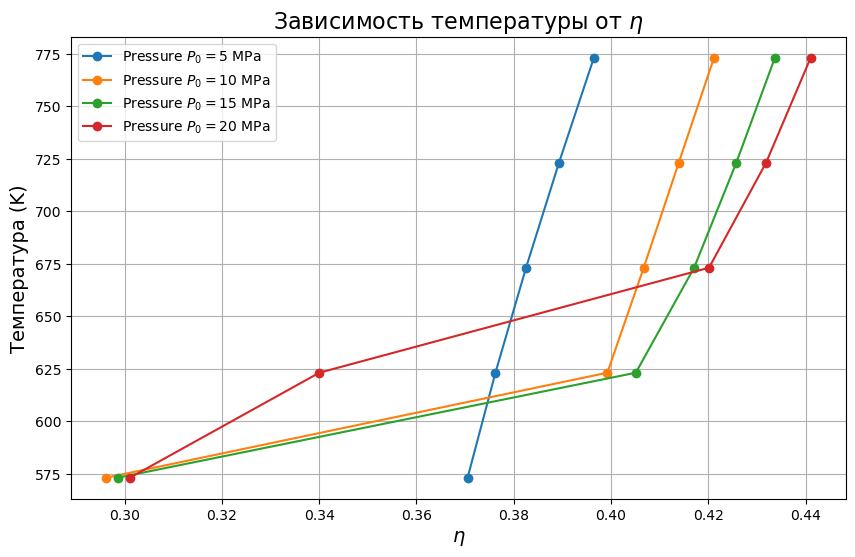

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(4):  
    pressure_values = eta_end.iloc[1:, i].astype(float)  
    temperature_values = eta_end.iloc[1:, 4].astype(float)  

    plt.plot(pressure_values, temperature_values, marker='o', label=eta_end.iloc[0, i])

plt.title('Зависимость температуры от $\eta$', fontsize=16)
plt.xlabel('$\eta$', fontsize=14)
plt.ylabel('Температура (K)', fontsize=14)
plt.legend()  
plt.grid(True)

plt.show()

# Задача 2

Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара: $P_0$ = 5 MPa, $t_0 = 450 ^{\circ}$C, $p_k$ = 5, 10, 15, 20, 50 kPa. Принять давление за последней ступенью паровой турбины $p_2 = p_k$. Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.тивной системе.

In [77]:
p_0 = 5*MPa
t_0 = to_kelvin(450)
p_k = [5*kPa, 10*kPa, 15*kPa, 20*kPa, 50*kPa]
eta_2 = [eta_calc(p_0=p_0, p_k=p_k[i], t_0=t_0) for i in range(len(p_k))]
eta_end = [["Pressure $P_k$"], ["$\eta$"]]

for i in range(5):
    eta_end[0].append(p_k[i])
    eta_end[1].append(eta_2[i])

eta_end = pd.DataFrame(eta_end).T
# eta_end

<>:5: SyntaxWarning:

invalid escape sequence '\e'

<>:5: SyntaxWarning:

invalid escape sequence '\e'

C:\Users\Vait_\AppData\Local\Temp\ipykernel_22256\2695589818.py:5: SyntaxWarning:

invalid escape sequence '\e'



<>:11: SyntaxWarning:

invalid escape sequence '\e'

<>:13: SyntaxWarning:

invalid escape sequence '\e'

<>:11: SyntaxWarning:

invalid escape sequence '\e'

<>:13: SyntaxWarning:

invalid escape sequence '\e'

C:\Users\Vait_\AppData\Local\Temp\ipykernel_22256\2283958176.py:11: SyntaxWarning:

invalid escape sequence '\e'

C:\Users\Vait_\AppData\Local\Temp\ipykernel_22256\2283958176.py:13: SyntaxWarning:

invalid escape sequence '\e'



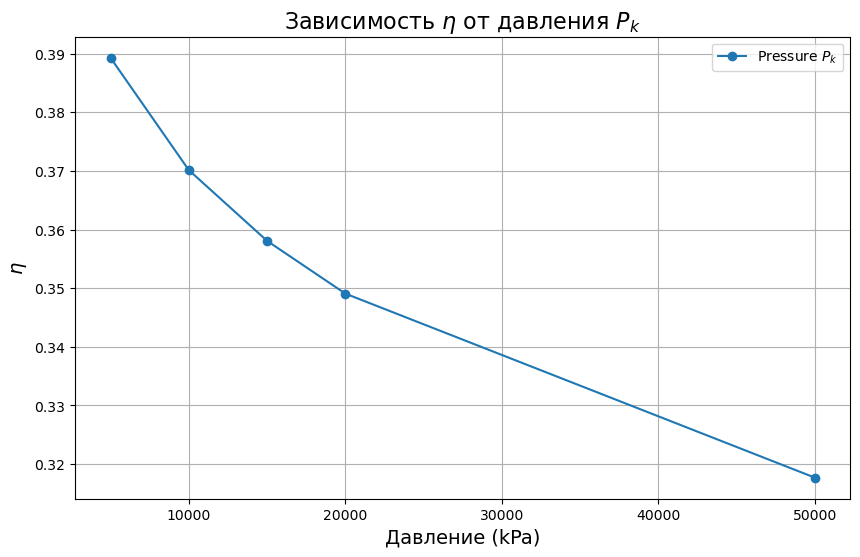

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# for i in range(4):  
# pressure_values = eta_end.iloc[1:, 0].astype(float)  
# temperature_values = eta_end.iloc[1:, 4].astype(float)  

plt.plot(eta_end[0][1:], eta_end[1][1:], marker='o', label=eta_end.iloc[0, 0])

plt.title('Зависимость $\eta$ от давления $P_k$', fontsize=16)
plt.xlabel('Давление (kPa)', fontsize=14)
plt.ylabel('$\eta$', fontsize=14)
plt.legend()  
plt.grid(True)


plt.show()